## Competição Kaggle de Machine Learning - Julho/2019
Predicting Molecular Properties
https://www.kaggle.com/c/champs-scalar-coupling/
## MARCIO DE LIMA
As submissões para esta competição serão avaliadas pelo MAE.
For this metric, the MAE for any group has a floor of 1e-9, so that the minimum (best) possible score for perfect predictions is approximately -20.7232.

Observações importantes => Não entendo nada de química molecular kkkk.  

** SE ESSE CODIGO FOR UTIL, VOTE , POR FAVOR **

## Objetivo
This challenge aims to predict interactions between atoms. The main task is develop an algorithm that can predict the magnetic interaction between two atoms in a molecule (i.e., the scalar coupling constant)

In this competition, you will be predicting the scalar_coupling_constant between atom pairs in molecules, given the two atom types (e.g., C and H), the coupling type (e.g., 2JHC), and any features you are able to create from the molecule structure (xyz) files.

In [31]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [32]:
# Carregando os arquivos
df = pd.read_csv('../input/train.csv')

df_energia = pd.read_csv('../input/potential_energy.csv')
df_charges = pd.read_csv('../input/mulliken_charges.csv')
df_estrutura = pd.read_csv('../input/structures.csv')

df.head(5)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [33]:
df_teste = pd.read_csv('../input/test.csv')

In [34]:
# Mostrando as estruturas dos Datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658147 entries, 0 to 4658146
Data columns (total 6 columns):
id                          int64
molecule_name               object
atom_index_0                int64
atom_index_1                int64
type                        object
scalar_coupling_constant    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.2+ MB


In [35]:
# Mostrando as estruturas dos Datasets - Energia
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85003 entries, 0 to 85002
Data columns (total 2 columns):
molecule_name       85003 non-null object
potential_energy    85003 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [36]:
# Mostrando as estruturas dos Datasets - Estrutura
df_estrutura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358657 entries, 0 to 2358656
Data columns (total 6 columns):
molecule_name    object
atom_index       int64
atom             object
x                float64
y                float64
z                float64
dtypes: float64(3), int64(1), object(2)
memory usage: 108.0+ MB


In [37]:
#Checando valores NA nos dados
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [38]:
df_teste.isna().any()[lambda x: x]

Series([], dtype: bool)

In [39]:
df_estrutura.isna().any()[lambda x: x]

Series([], dtype: bool)

In [40]:
df_energia.isna().any()[lambda x: x]

Series([], dtype: bool)

In [41]:
# Coletando os dados - Merge / Mesclagem dos DataSets
df = pd.merge(df, df_energia, how = 'left',
                  left_on  = ['molecule_name'],
                  right_on = ['molecule_name'])

df = pd.merge(df, df_charges, how = 'left',
                  left_on  = ['molecule_name','atom_index_0'],
                  right_on = ['molecule_name','atom_index'])

df = df.drop('atom_index', axis=1)


In [42]:
df = pd.merge(df, df_charges, how = 'left',
                  left_on  = ['molecule_name','atom_index_1'],
                  right_on = ['molecule_name','atom_index'])


In [43]:
df = df.drop('atom_index', axis=1)
df.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,potential_energy,mulliken_charge_x,mulliken_charge_y
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,-40.52368,0.133921,-0.535689
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,-40.52368,0.133921,0.133922
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,-40.52368,0.133921,0.133923
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,-40.52368,0.133921,0.133923
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,-40.52368,0.133922,-0.535689
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,-40.52368,0.133922,0.133923
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,-40.52368,0.133922,0.133923
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,-40.52368,0.133923,-0.535689
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,-40.52368,0.133923,0.133923
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,-40.52368,0.133923,-0.535689


In [44]:
#Replicando para os dados de Teste
df_teste = pd.merge(df_teste, df_energia, how = 'left',
                  left_on  = ['molecule_name'],
                  right_on = ['molecule_name'])

df_teste = pd.merge(df_teste, df_charges, how = 'left',
                  left_on  = ['molecule_name','atom_index_0'],
                  right_on = ['molecule_name','atom_index'])

df_teste = df_teste.drop('atom_index', axis=1)

df_teste = pd.merge(df_teste, df_charges, how = 'left',
                  left_on  = ['molecule_name','atom_index_1'],
                  right_on = ['molecule_name','atom_index'])

df_teste = df_teste.drop('atom_index', axis=1)

In [45]:
# Coletando os dados - Merge / Mesclagem dos DataSets - Parte 2
df = pd.merge(df, df_estrutura, how = 'left',
                  left_on  = ['molecule_name','atom_index_0'],
                  right_on = ['molecule_name','atom_index'])

df = df.rename(columns={'atom': 'atom_0',
                            'x': 'x_0',
                            'y': 'y_0',
                            'z': 'z_0'})

df = df.drop('atom_index', axis=1)


In [46]:

df = pd.merge(df, df_estrutura, how = 'left',
                 left_on  = ['molecule_name','atom_index_1'],
                 right_on = ['molecule_name','atom_index'])

df = df.rename(columns={'atom': 'atom_1',
                            'x': 'x_1',
                            'y': 'y_1',
                            'z': 'z_1'})

df = df.drop('atom_index', axis=1)



In [47]:
df.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,potential_energy,mulliken_charge_x,mulliken_charge_y,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,-40.52368,0.133921,-0.535689,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,-40.52368,0.133921,0.133922,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,-40.52368,0.133921,0.133923,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,-40.52368,0.133921,0.133923,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,-40.52368,0.133922,-0.535689,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,-40.52368,0.133922,0.133923,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,-40.52368,0.133922,0.133923,H,1.011731,1.463751,0.000277,H,-0.523814,1.437933,0.906397
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,-40.52368,0.133923,-0.535689,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,-40.52368,0.133923,0.133923,H,-0.540815,1.447527,-0.876644,H,-0.523814,1.437933,0.906397
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,-40.52368,0.133923,-0.535689,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001


In [48]:
# Replicando - Parte 2 para o Teste
df_teste = pd.merge(df_teste, df_estrutura, how = 'left',
                  left_on  = ['molecule_name','atom_index_0'],
                  right_on = ['molecule_name','atom_index'])

df_teste = df_teste.rename(columns={'atom': 'atom_0',
                            'x': 'x_0',
                            'y': 'y_0',
                            'z': 'z_0'})

df_teste = df_teste.drop('atom_index', axis=1)

df_teste = pd.merge(df_teste, df_estrutura, how = 'left',
                 left_on  = ['molecule_name','atom_index_1'],
                 right_on = ['molecule_name','atom_index'])

df_teste = df_teste.rename(columns={'atom': 'atom_1',
                            'x': 'x_1',
                            'y': 'y_1',
                            'z': 'z_1'})

df_teste = df_teste.drop('atom_index', axis=1)

In [49]:
df.dtypes

id                            int64
molecule_name                object
atom_index_0                  int64
atom_index_1                  int64
type                         object
scalar_coupling_constant    float64
potential_energy            float64
mulliken_charge_x           float64
mulliken_charge_y           float64
atom_0                       object
x_0                         float64
y_0                         float64
z_0                         float64
atom_1                       object
x_1                         float64
y_1                         float64
z_1                         float64
dtype: object

In [50]:
# Criando nova coluna do type
df['type1'] = df['type'].apply(lambda x: x[0])


In [51]:
df_teste['type1'] = df_teste['type'].apply(lambda x: x[0])

In [52]:
df.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,potential_energy,mulliken_charge_x,mulliken_charge_y,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,type1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,-40.52368,0.133921,-0.535689,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,-40.52368,0.133921,0.133922,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,2
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,-40.52368,0.133921,0.133923,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,2
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,-40.52368,0.133921,0.133923,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,2
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,-40.52368,0.133922,-0.535689,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,-40.52368,0.133922,0.133923,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644,2
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,-40.52368,0.133922,0.133923,H,1.011731,1.463751,0.000277,H,-0.523814,1.437933,0.906397,2
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,-40.52368,0.133923,-0.535689,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001,1
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,-40.52368,0.133923,0.133923,H,-0.540815,1.447527,-0.876644,H,-0.523814,1.437933,0.906397,2
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,-40.52368,0.133923,-0.535689,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001,1


Usado alguns pontos do kernel. https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark

In [53]:
df['atom_0'].unique()

array(['H'], dtype=object)

In [54]:
df['atom_1'].unique()

array(['C', 'H', 'N'], dtype=object)

In [55]:
# Radius dos átomos - Nova Coluna
df['rad'] = df['atom_0'].map({'H':0.43, 'C':0.82, 'N':0.8, 'O':0.78, 'F':0.76})
df['rad_1'] = df['atom_1'].map({'H':0.43, 'C':0.82, 'N':0.8, 'O':0.78, 'F':0.76})

# Nova coluna de Eletrons negativos
df['electro'] = df['atom_0'].map({'H':2.2, 'C':2.55, 'N':3.04, 'O':3.44, 'F':3.98})
df['electro1'] = df['atom_1'].map({'H':2.2, 'C':2.55, 'N':3.04, 'O':3.44, 'F':3.98})


In [56]:
df_teste.dtypes

id                     int64
molecule_name         object
atom_index_0           int64
atom_index_1           int64
type                  object
potential_energy     float64
mulliken_charge_x    float64
mulliken_charge_y    float64
atom_0                object
x_0                  float64
y_0                  float64
z_0                  float64
atom_1                object
x_1                  float64
y_1                  float64
z_1                  float64
type1                 object
dtype: object

In [57]:
# Radius dos átomos - Nova Coluna - TESTE
df_teste['rad'] = df_teste['atom_0'].map({'H':0.43, 'C':0.82, 'N':0.8, 'O':0.78, 'F':0.76})
df_teste['rad_1'] = df_teste['atom_1'].map({'H':0.43, 'C':0.82, 'N':0.8, 'O':0.78, 'F':0.76})

# Nova coluna de Eletrons negativos  - TESTE
df_teste['electro'] = df_teste['atom_0'].map({'H':2.2, 'C':2.55, 'N':3.04, 'O':3.44, 'F':3.98})
df_teste['electro1'] = df_teste['atom_1'].map({'H':2.2, 'C':2.55, 'N':3.04, 'O':3.44, 'F':3.98})

In [58]:
df.head(5)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,potential_energy,mulliken_charge_x,mulliken_charge_y,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,type1,rad,rad_1,electro,electro1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,-40.52368,0.133921,-0.535689,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1,0.43,0.82,2.2,2.55
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,-40.52368,0.133921,0.133922,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,2,0.43,0.43,2.2,2.20
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,-40.52368,0.133921,0.133923,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,2,0.43,0.43,2.2,2.20
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,-40.52368,0.133921,0.133923,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,2,0.43,0.43,2.2,2.20
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,-40.52368,0.133922,-0.535689,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1,0.43,0.82,2.2,2.55


In [59]:
#Limpando a Memória
del([df_energia, df_charges, df_estrutura])


# Calculo das Distancias entre os Atomos

In [60]:
# Calculando a distancia entre os 2 atómos - Nova coluna
df["distance"] = ((df['x_0']-df['x_1'])**2 + (df['y_0']-df['y_1'])**2 + (df['z_0']-df['z_1'])**2) ** (1/2)
# Calculando o mulliken entre os 2 atómos - Nova coluna
df['charge'] = ((df['mulliken_charge_x'] - df['mulliken_charge_y']) **2) ** (1/2)

In [61]:
# Calculando a distancia entre os 2 atómos - Nova coluna - TESTE
df_teste["distance"] = ((df_teste['x_0']-df_teste['x_1'])**2 + (df_teste['y_0']-df_teste['y_1'])**2 + (df_teste['z_0']-df_teste['z_1'])**2) ** (1/2)
# Calculando o mulliken entre os 2 atómos - Nova coluna
df_teste['charge'] = ((df_teste['mulliken_charge_x'] - df_teste['mulliken_charge_y']) **2) ** (1/2)

In [62]:
#Calculando a distancia por molécula individualmente e calculo a diferença entre as duas
df["distance_0"] = 1 / (((df['x_0']**2) + (df['y_0']**2) + (df['z_0']**2)) ** (1/2) ** 3 )
df["distance_1"] = 1 / (((df['x_1']**2) + (df['y_1']**2) + (df['z_1']**2)) ** (1/2) ** 3 )
df["distance_dif"] = (df["distance_0"] * df["distance_1"]) / (df["distance_0"] + df["distance_1"])

#Calculando a distancia por molécula individualmente e calculo a diferença entre as duas utilizando o radios das moléculas
df["distance_0_Rad"] = 1/((df["distance_0"]-df["rad"])** (1/2) ** 3 )
df["distance_1_Rad"] = 1/((df["distance_1"]-df["rad_1"])** (1/2) ** 3 )
df["distance_dif_Rad"] = (df["distance_0_Rad"] * df["distance_1_Rad"]) / (df["distance_0_Rad"] + df["distance_1_Rad"]) 

#Calculo dos eletrons
df["distance_0_Elec"] = (df["distance_0"]*df["electro"])** 3
df["distance_1_Elec"] = (df["distance_1"]*df["electro1"])** 3
df["distance_dif_Elec"] = (df["distance_0_Elec"] * df["distance_1_Elec"]) / (df["distance_0_Elec"] + df["distance_1_Elec"]) 


In [63]:
#Replicando para o TESTE
df_teste["distance_0"] = 1 / (((df_teste['x_0']**2) + (df_teste['y_0']**2) + (df_teste['z_0']**2)) ** (1/2) ** 3 )
df_teste["distance_1"] = 1 / (((df_teste['x_1']**2) + (df_teste['y_1']**2) + (df_teste['z_1']**2)) ** (1/2) ** 3 )
df_teste["distance_dif"] = (df_teste["distance_0"] * df_teste["distance_1"]) / (df_teste["distance_0"] + df_teste["distance_1"])

#Calculando a distancia por molécula individualmente e calculo a diferença entre as duas utilizando o radios das moléculas
df_teste["distance_0_Rad"] = 1/((df_teste["distance_0"]-df_teste["rad"])** (1/2) ** 3 )
df_teste["distance_1_Rad"] = 1/((df_teste["distance_1"]-df_teste["rad_1"])** (1/2) ** 3 )
df_teste["distance_dif_Rad"] = (df_teste["distance_0_Rad"] * df_teste["distance_1_Rad"]) / (df_teste["distance_0_Rad"] + df_teste["distance_1_Rad"]) 

#Calculo dos eletrons
df_teste["distance_0_Elec"] = (df_teste["distance_0"]*df_teste["electro"])** 3
df_teste["distance_1_Elec"] = (df_teste["distance_1"]*df_teste["electro1"])** 3
df_teste["distance_dif_Elec"] = (df_teste["distance_0_Elec"] * df_teste["distance_1_Elec"]) / (df_teste["distance_0_Elec"] + df_teste["distance_1_Elec"]) 


In [64]:
#Checando valores NA nos dados
df.isna().any()[lambda x: x]

distance_1_Rad      True
distance_dif_Rad    True
dtype: bool

In [65]:
df_teste.isna().any()[lambda x: x]

potential_energy     True
mulliken_charge_x    True
mulliken_charge_y    True
charge               True
distance_1_Rad       True
distance_dif_Rad     True
dtype: bool

In [66]:
#Preenchendo NAs
df['distance_1_Rad'].fillna((df['distance_1_Rad'].mean()), inplace=True)
df['distance_dif_Rad'].fillna((df['distance_dif_Rad'].mean()), inplace=True)


In [67]:
#Preenchendo NAs
df_teste['distance_1_Rad'].fillna((df_teste['distance_1_Rad'].mean()), inplace=True)
df_teste['distance_dif_Rad'].fillna((df_teste['distance_dif_Rad'].mean()), inplace=True)
df_teste['potential_energy'].fillna((df_teste['potential_energy'].mean()), inplace=True)
df_teste['mulliken_charge_x'].fillna((df_teste['mulliken_charge_x'].mean()), inplace=True)
df_teste['mulliken_charge_y'].fillna((df_teste['mulliken_charge_y'].mean()), inplace=True)
df_teste['charge'].fillna((df_teste['charge'].mean()), inplace=True)


In [68]:
# Separando as colunas que não serão usadas no modelo
df = df.drop('id', axis=1)
df = df.drop('molecule_name', axis=1)
df = df.drop('atom_index_0', axis=1)
df = df.drop('atom_index_1', axis=1)
df = df.drop('type', axis=1)
df = df.drop('atom_0', axis=1)
df = df.drop('atom_1', axis=1)


In [69]:
df_teste = df_teste.drop('id', axis=1)
df_teste = df_teste.drop('molecule_name', axis=1)
df_teste = df_teste.drop('atom_index_0', axis=1)
df_teste = df_teste.drop('atom_index_1', axis=1)
df_teste = df_teste.drop('type', axis=1)
df_teste = df_teste.drop('atom_0', axis=1)
df_teste = df_teste.drop('atom_1', axis=1)

In [70]:
df_treino = df

In [71]:
del(df)

In [72]:
# Correlação com a Variavel TARGET => scalar_coupling_constant
df_treino[df_treino.columns.drop('scalar_coupling_constant')].corrwith(df_treino.scalar_coupling_constant)


potential_energy    -1.718739e-02
mulliken_charge_x   -2.544391e-02
mulliken_charge_y   -3.607454e-01
x_0                 -6.015353e-03
y_0                 -1.311927e-02
z_0                  4.806954e-03
x_1                  5.132041e-03
y_1                  2.118908e-02
z_1                 -7.791606e-03
rad                 -8.131980e-16
rad_1                2.527633e-01
electro             -7.773754e-16
electro1             1.359098e-01
distance            -6.686628e-01
charge               3.288492e-01
distance_0          -3.117057e-02
distance_1          -6.244072e-02
distance_dif        -4.271671e-02
distance_0_Rad       3.621431e-02
distance_1_Rad       1.289794e-01
distance_dif_Rad     1.155947e-01
distance_0_Elec     -2.585736e-02
distance_1_Elec     -5.472463e-02
distance_dif_Elec    5.128697e-02
dtype: float64

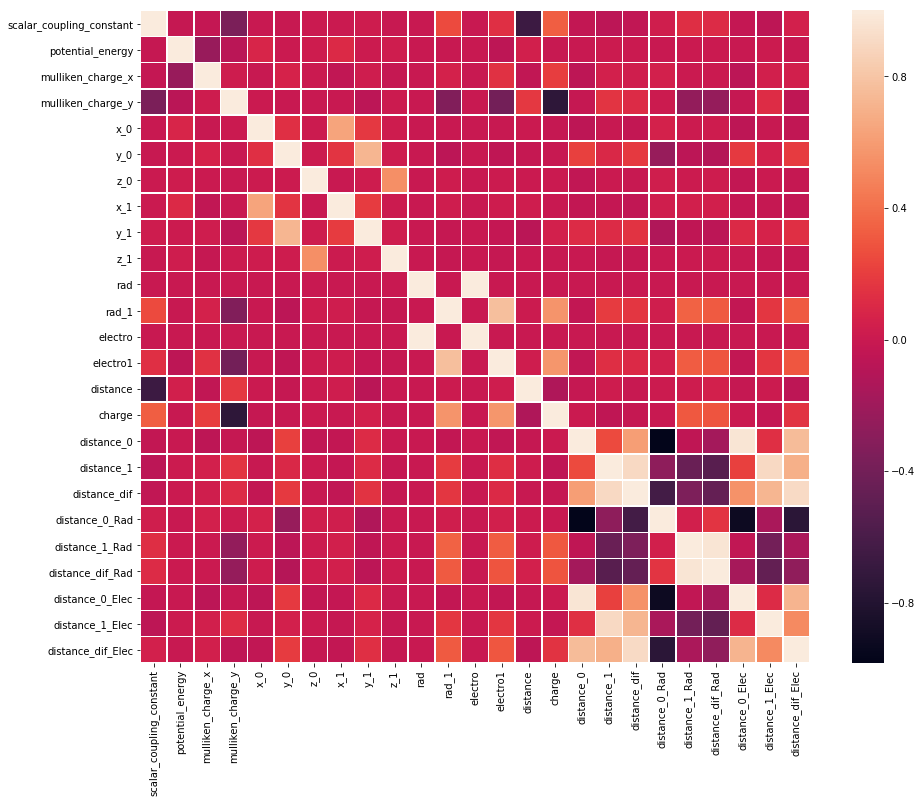

In [73]:
# Visualizando e analisando os dados

# Construindo um gráfico de HEATMAP
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df_treino.corr(),linewidths=.5, ax=ax)

In [74]:
# Histogramas
#df_treino.plot(kind = 'hist', subplots = True, layout = (7,4), sharex = False, figsize=(20,70))
#plt.show()

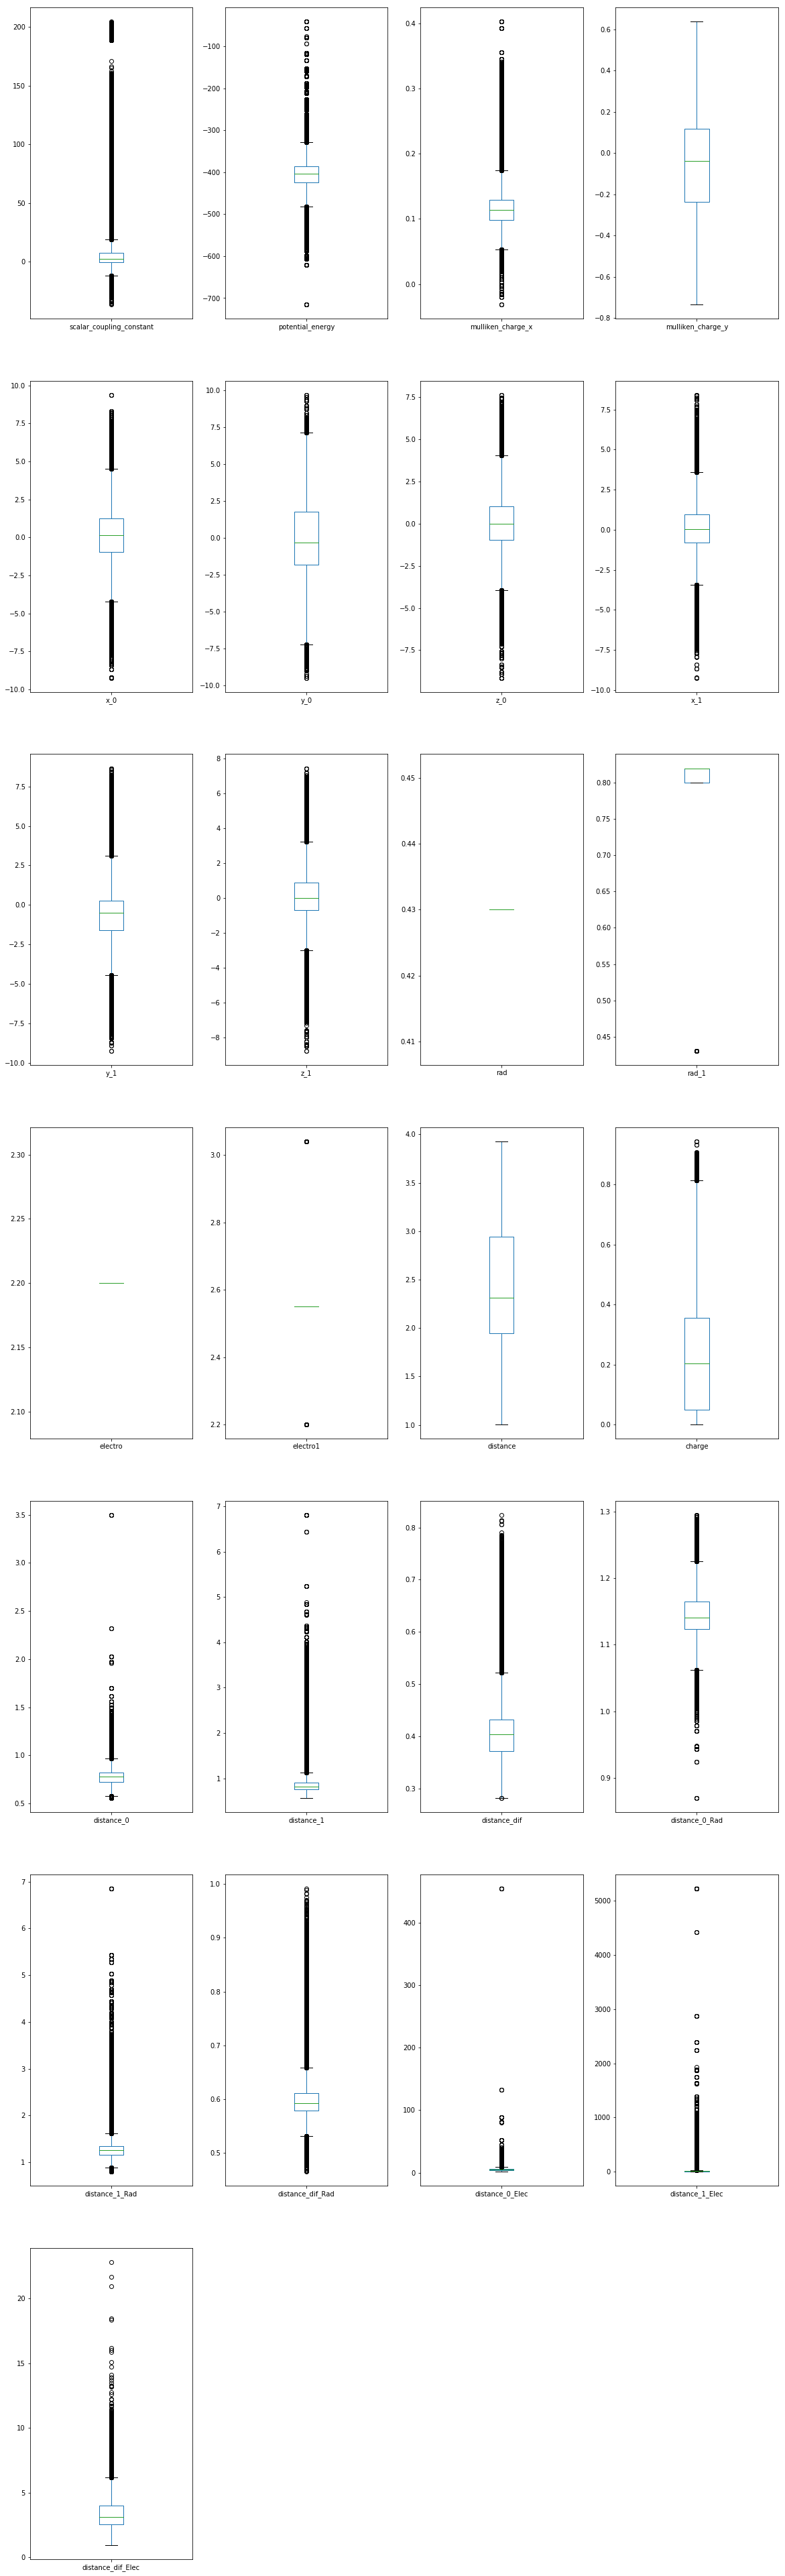

In [75]:
# Box-Plot
df_treino.plot(kind = 'box', subplots = True, layout = (7,4), sharex = False, sharey = False, figsize=(20,70))
plt.show()

In [76]:
df_treino.shape

(4658147, 26)

In [77]:
df_teste.shape

(2505542, 25)

In [78]:
# Ajustando e padronizando as escalas - Normalização
from sklearn.preprocessing import MinMaxScaler

array = df_treino.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,1:26]
X_sub = df_teste.values
Y = array[:,0]


In [79]:
#Limpando a Memória
del(df_teste)

In [80]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)
rescaledX_teste = scaler.fit_transform(X_sub)


In [81]:
# Comecando o modelo - Versao 1 - Mais basico e simples
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)


In [82]:
# Criando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mae = mean_absolute_error(Y_test, Y_pred)
print('Modelo 1 - Regressao Linear => MAE = %0.4f' % mae)

Modelo 1 - Regressao Linear => MAE = 18.6783


In [83]:
# Modelo 2 - lightgbm simples
import lightgbm as lgb

gbm = lgb.LGBMRegressor(num_leaves=50,
                        learning_rate=0.05,
                        n_estimators=100)
gbm.fit(X_train, Y_train,
        eval_set=[(X_test, Y_test)],
        eval_metric='l1',
        early_stopping_rounds=100,
        verbose=0
       )


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=50, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [84]:
Y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

# Resultado
mae = np.log(mean_absolute_error(Y_test, Y_pred))
print('Modelo 2 - LightGBM => MAE = %0.4f' % mae)

Modelo 2 - LightGBM => MAE = 0.7530


In [85]:
# Funcoes utilitaria
# Treinamento e resultado do modelo - funcao generica
def treine_e_avalie(model, X, y, X_test, y_test):
    
    # Predicao
    model_pred = treino_e_predicao(model, X, y, X_test)
    #Performance
    model_mae = np.log(mean_absolute_error(y_test, model_pred))
    
    # Retorno da Performance do modelo
    return model_mae

def treino_e_predicao(model, X, y, X_test):
    
    # FIT
    model.fit(X, y)
    # Predicao
    return model.predict(X_test)


In [86]:
# Importando mais modelos 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [87]:
# Modelo 3 - KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn_mae = treine_e_avalie(knn, X_train, Y_train, X_test, Y_test)

print('Modelo 3 - KNN => MAE = %0.4f' % knn_mae)

Modelo 3 - KNN => MAE = 1.1809


In [88]:
# Modelo 4 - GradientBoostingRegressor
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = treine_e_avalie(gradient_boosted, X_train, Y_train, X_test, Y_test)

print('Modelo 4 - GradientBoostingRegressor = %0.4f' % gradient_boosted_mae)


Modelo 4 - GradientBoostingRegressor = 0.9239


# ESCOLHIDO MODELO 2 - LIGHTGBM - MENOR MAE

In [89]:
#Otimizando o modelo 2
#from sklearn.model_selection import GridSearchCV

#estimator = lgb.LGBMRegressor()

#param_grid = {
#    'learning_rate': [0.005,0.05, 0.1, 1],
#    'n_estimators': [100],
#    'num_leaves': [50],
#    'boosting_type' : ['gbdt','dart'],
#    'objective' : ['regression'],
#    'colsample_bytree' : [0.65, 0.66],
#    'subsample' : [0.7,0.75],
#    'reg_alpha' : [1,1.2],
#    'reg_lambda' : [1,1.2,1.4]    
#}

#gbm1 = GridSearchCV(estimator, param_grid, cv=5, verbose=0)
#gbm1.fit(X_train, Y_train)

#print('Melhores parametros:', gbm1.best_params_)
#print('Melhor score:', gbm1.best_score_)

In [90]:
# Modelo 5 - otimizado
gbm = lgb.LGBMRegressor(num_leaves=100,
                        learning_rate=1.10,
                        n_estimators=500,
                        boosting_type='dart',
                        metric='mae',
                        objective='regression_l1',
                        #max_depth=19,
                        #subsample=0.75,
                        verbosity=-0,
                        reg_alpha=1.2,
                        reg_lambda=1,
                        #sub_feature = 0.75,
                        #sub_row = 0.50,
                        #bagging_freq = 1,                        
                        #colsample_bytree=0.65
                        )
gbm.fit(X_train, Y_train,
        eval_set=[(X_test, Y_test)],
        eval_metric='l1',
        early_stopping_rounds=200,
        verbose=1
       )

Y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

# Resultado
mae = np.log(mean_absolute_error(Y_test, Y_pred))
print('Modelo 5 - LightGBM - Otimizado => MAE = %0.4f' % mae)

[1]	valid_0's l1: 4.16448	valid_0's l1: 4.16448
[2]	valid_0's l1: 2.64799	valid_0's l1: 2.64799
[3]	valid_0's l1: 2.31872	valid_0's l1: 2.31872
[4]	valid_0's l1: 2.15756	valid_0's l1: 2.15756
[5]	valid_0's l1: 2.11412	valid_0's l1: 2.11412
[6]	valid_0's l1: 2.09525	valid_0's l1: 2.09525
[7]	valid_0's l1: 2.07354	valid_0's l1: 2.07354
[8]	valid_0's l1: 2.0795	valid_0's l1: 2.0795
[9]	valid_0's l1: 2.04576	valid_0's l1: 2.04576
[10]	valid_0's l1: 2.03365	valid_0's l1: 2.03365
[11]	valid_0's l1: 2.02377	valid_0's l1: 2.02377
[12]	valid_0's l1: 2.02049	valid_0's l1: 2.02049
[13]	valid_0's l1: 2.0059	valid_0's l1: 2.0059
[14]	valid_0's l1: 1.99711	valid_0's l1: 1.99711
[15]	valid_0's l1: 1.99031	valid_0's l1: 1.99031
[16]	valid_0's l1: 1.98179	valid_0's l1: 1.98179
[17]	valid_0's l1: 1.97518	valid_0's l1: 1.97518
[18]	valid_0's l1: 1.97034	valid_0's l1: 1.97034
[19]	valid_0's l1: 1.96571	valid_0's l1: 1.96571
[20]	valid_0's l1: 1.96235	valid_0's l1: 1.96235
[21]	valid_0's l1: 1.95823	valid_

[168]	valid_0's l1: 1.6793	valid_0's l1: 1.6793
[169]	valid_0's l1: 1.67744	valid_0's l1: 1.67744
[170]	valid_0's l1: 1.67877	valid_0's l1: 1.67877
[171]	valid_0's l1: 1.67659	valid_0's l1: 1.67659
[172]	valid_0's l1: 1.67796	valid_0's l1: 1.67796
[173]	valid_0's l1: 1.67558	valid_0's l1: 1.67558
[174]	valid_0's l1: 1.67444	valid_0's l1: 1.67444
[175]	valid_0's l1: 1.67335	valid_0's l1: 1.67335
[176]	valid_0's l1: 1.67384	valid_0's l1: 1.67384
[177]	valid_0's l1: 1.67434	valid_0's l1: 1.67434
[178]	valid_0's l1: 1.67467	valid_0's l1: 1.67467
[179]	valid_0's l1: 1.67269	valid_0's l1: 1.67269
[180]	valid_0's l1: 1.67301	valid_0's l1: 1.67301
[181]	valid_0's l1: 1.67179	valid_0's l1: 1.67179
[182]	valid_0's l1: 1.67	valid_0's l1: 1.67
[183]	valid_0's l1: 1.66822	valid_0's l1: 1.66822
[184]	valid_0's l1: 1.66734	valid_0's l1: 1.66734
[185]	valid_0's l1: 1.66728	valid_0's l1: 1.66728
[186]	valid_0's l1: 1.6657	valid_0's l1: 1.6657
[187]	valid_0's l1: 1.66332	valid_0's l1: 1.66332
[188]	vali

[333]	valid_0's l1: 1.59945	valid_0's l1: 1.59945
[334]	valid_0's l1: 1.59973	valid_0's l1: 1.59973
[335]	valid_0's l1: 1.59735	valid_0's l1: 1.59735
[336]	valid_0's l1: 1.59761	valid_0's l1: 1.59761
[337]	valid_0's l1: 1.59673	valid_0's l1: 1.59673
[338]	valid_0's l1: 1.59587	valid_0's l1: 1.59587
[339]	valid_0's l1: 1.59613	valid_0's l1: 1.59613
[340]	valid_0's l1: 1.59643	valid_0's l1: 1.59643
[341]	valid_0's l1: 1.59558	valid_0's l1: 1.59558
[342]	valid_0's l1: 1.59501	valid_0's l1: 1.59501
[343]	valid_0's l1: 1.59437	valid_0's l1: 1.59437
[344]	valid_0's l1: 1.59459	valid_0's l1: 1.59459
[345]	valid_0's l1: 1.59426	valid_0's l1: 1.59426
[346]	valid_0's l1: 1.59312	valid_0's l1: 1.59312
[347]	valid_0's l1: 1.59328	valid_0's l1: 1.59328
[348]	valid_0's l1: 1.5927	valid_0's l1: 1.5927
[349]	valid_0's l1: 1.59218	valid_0's l1: 1.59218
[350]	valid_0's l1: 1.5924	valid_0's l1: 1.5924
[351]	valid_0's l1: 1.59176	valid_0's l1: 1.59176
[352]	valid_0's l1: 1.59111	valid_0's l1: 1.59111
[353

[498]	valid_0's l1: 1.55099	valid_0's l1: 1.55099
[499]	valid_0's l1: 1.55117	valid_0's l1: 1.55117
[500]	valid_0's l1: 1.55097	valid_0's l1: 1.55097
[501]	valid_0's l1: 1.55111	valid_0's l1: 1.55111
[502]	valid_0's l1: 1.55051	valid_0's l1: 1.55051
[503]	valid_0's l1: 1.55034	valid_0's l1: 1.55034
[504]	valid_0's l1: 1.55052	valid_0's l1: 1.55052
[505]	valid_0's l1: 1.55076	valid_0's l1: 1.55076
[506]	valid_0's l1: 1.5503	valid_0's l1: 1.5503
[507]	valid_0's l1: 1.54986	valid_0's l1: 1.54986
[508]	valid_0's l1: 1.54929	valid_0's l1: 1.54929
[509]	valid_0's l1: 1.54892	valid_0's l1: 1.54892
[510]	valid_0's l1: 1.54826	valid_0's l1: 1.54826
[511]	valid_0's l1: 1.54837	valid_0's l1: 1.54837
[512]	valid_0's l1: 1.54824	valid_0's l1: 1.54824
[513]	valid_0's l1: 1.54785	valid_0's l1: 1.54785
[514]	valid_0's l1: 1.54749	valid_0's l1: 1.54749
[515]	valid_0's l1: 1.54719	valid_0's l1: 1.54719
[516]	valid_0's l1: 1.54734	valid_0's l1: 1.54734
[517]	valid_0's l1: 1.54755	valid_0's l1: 1.54755
[5

[663]	valid_0's l1: 1.52858	valid_0's l1: 1.52858
[664]	valid_0's l1: 1.52883	valid_0's l1: 1.52883
[665]	valid_0's l1: 1.52919	valid_0's l1: 1.52919
[666]	valid_0's l1: 1.52946	valid_0's l1: 1.52946
[667]	valid_0's l1: 1.52957	valid_0's l1: 1.52957
[668]	valid_0's l1: 1.52978	valid_0's l1: 1.52978
[669]	valid_0's l1: 1.52904	valid_0's l1: 1.52904
[670]	valid_0's l1: 1.52881	valid_0's l1: 1.52881
[671]	valid_0's l1: 1.529	valid_0's l1: 1.529
[672]	valid_0's l1: 1.52865	valid_0's l1: 1.52865
[673]	valid_0's l1: 1.52895	valid_0's l1: 1.52895
[674]	valid_0's l1: 1.52848	valid_0's l1: 1.52848
[675]	valid_0's l1: 1.52842	valid_0's l1: 1.52842
[676]	valid_0's l1: 1.52803	valid_0's l1: 1.52803
[677]	valid_0's l1: 1.52772	valid_0's l1: 1.52772
[678]	valid_0's l1: 1.52798	valid_0's l1: 1.52798
[679]	valid_0's l1: 1.52787	valid_0's l1: 1.52787
[680]	valid_0's l1: 1.52746	valid_0's l1: 1.52746
[681]	valid_0's l1: 1.5279	valid_0's l1: 1.5279
[682]	valid_0's l1: 1.52814	valid_0's l1: 1.52814
[683]	

KeyboardInterrupt: 

In [ ]:
#Features mais importantes do modelo
#sorted(zip(gbm.feature_importances_, df_treino.columns), reverse=True)


In [91]:
#Gerando os dados de submissao e predição
df_submission = pd.read_csv('../input/sample_submission.csv')
resultado = gbm.predict(X_sub, num_iteration=gbm.best_iteration_)
df_submission['scalar_coupling_constant'] = resultado

NotFittedError: No booster found. Need to call fit beforehand.

In [ ]:
#Gravando Arquivo de Submissao
df_submission.to_csv('submission.csv', index=False)

## FIM

## OBRIGADO